In [1]:
# use data reader function to download financial data
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# create start and endtimes for the year 2021
start = datetime.datetime(2021,1,1)
end = datetime.datetime(2021,12,31)

In [3]:
# create data sets for WMT and TGT
Walmart = data.DataReader("WMT",'yahoo', start, end)
Target = data.DataReader("TGT",'yahoo', start, end)

In [4]:
Walmart.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,146.889999,144.279999,144.300003,146.529999,10727400.0,144.236267
2021-01-05,147.070007,144.490005,146.600006,145.750000,8832700.0,143.468491
2021-01-06,148.100006,145.009995,145.089996,146.660004,7306300.0,144.364243
2021-01-07,147.759995,146.039993,147.619995,146.649994,6846000.0,144.354401
2021-01-08,147.000000,145.809998,146.880005,146.630005,8159400.0,144.334702


In [5]:
Target.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,178.089996,174.119995,176.509995,177.630005,3463100.0,174.467789
2021-01-05,181.970001,176.429993,176.800003,180.369995,4843300.0,177.159027
2021-01-06,189.470001,180.110001,180.330002,188.919998,5610100.0,185.556778
2021-01-07,192.350006,189.169998,189.210007,191.100006,4226700.0,187.697998
2021-01-08,193.880005,190.809998,191.580002,193.600006,3321500.0,190.153488


In [7]:
# create a percent change column for each data set
Walmart['% change'] = Walmart['Close'].pct_change()
Target['% change'] = Target['Close'].pct_change()

In [8]:
# create a log returns column for each data set
Walmart['Log returns'] = np.log(Walmart['Close']/Walmart['Close'].shift())
Target['Log returns'] = np.log(Target['Close']/Target['Close'].shift())

In [9]:
Walmart.head()

,High,Low,Open,Close,Volume,Adj Close,% change,Log returns
Date,,,,,,,,
2021-01-04,146.889999,144.279999,144.300003,146.529999,10727400.0,144.236267,NaN,NaN
2021-01-05,147.070007,144.490005,146.600006,145.750000,8832700.0,143.468491,-0.005323,-0.005337
2021-01-06,148.100006,145.009995,145.089996,146.660004,7306300.0,144.364243,0.006244,0.006224
2021-01-07,147.759995,146.039993,147.619995,146.649994,6846000.0,144.354401,-0.000068,-0.000068
2021-01-08,147.000000,145.809998,146.880005,146.630005,8159400.0,144.334702,-0.000136,-0.000136


In [10]:
Target.head()

,High,Low,Open,Close,Volume,Adj Close,% change,Log returns
Date,,,,,,,,
2021-01-04,178.089996,174.119995,176.509995,177.630005,3463100.0,174.467789,NaN,NaN
2021-01-05,181.970001,176.429993,176.800003,180.369995,4843300.0,177.159027,0.015425,0.015308
2021-01-06,189.470001,180.110001,180.330002,188.919998,5610100.0,185.556778,0.047403,0.046313
2021-01-07,192.350006,189.169998,189.210007,191.100006,4226700.0,187.697998,0.011539,0.011473
2021-01-08,193.880005,190.809998,191.580002,193.600006,3321500.0,190.153488,0.013082,0.012997


<AxesSubplot:title={'center':'Target Volume 2021'}, xlabel='Date'>

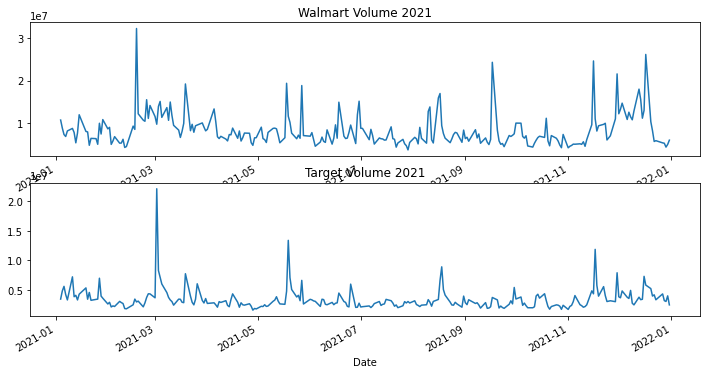

In [12]:
# create volume plots for both companies
fig, ax = plt.subplots(2)
Walmart['Volume'].loc['2021-01-01':].plot(ax=ax[0], title="Walmart Volume 2021", figsize=(12,6))
Target['Volume'].loc['2021-01-01':].plot(ax=ax[1], title="Target Volume 2021", figsize=(12,6))

In [13]:
# Throughout 2021 Walmart had higher volumes than Target. We see numerous spikes in volume for Walmart and a few for Target.
# Some of these spikes match up to one another, we see the sharpest spikes in volumes for both companies at or around the 
# beginning of March. Walmart and Target also saw numerous spikes and increased volumes in December of 2021.

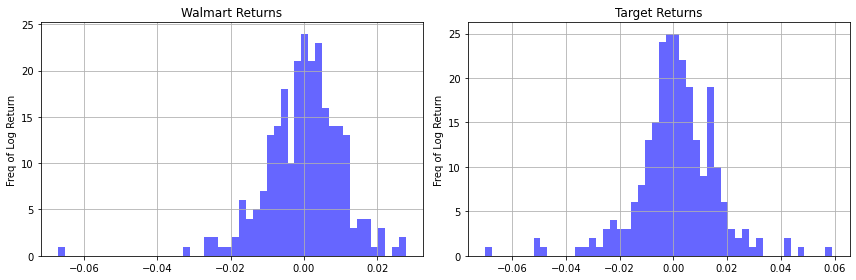

In [16]:
# create a combined plot of histograms for Target and Walmarts log returns for 2021
fig, ax = plt.subplots(1,2)
Walmart['Log returns'].hist(ax=ax[0], bins=50, alpha=0.6, color='b', figsize=(12,4))
ax[0].set_ylabel('Freq of Log Return')
ax[0].set_title('Walmart Returns')

Target['Log returns'].hist(ax=ax[1], bins=50, alpha=0.6, color='b', figsize=(12,4))
ax[1].set_ylabel('Freq of Log Return')
ax[1].set_title('Target Returns')

fig.tight_layout()

In [17]:
# Walmart has more consistent returns because a large chunk of their returns are between -0.02 and 0.02 (with outliers), while Target has a 
# larger spread in their returns ranging from -0.04 to 0.04 (with outliers).

In [18]:
Walmart['Log returns'].std()

0.010566097093939207

In [19]:
Target['Log returns'].std()

0.014964775897820567

In [20]:
# calculate the volatility of walmart stock price
Walmart_volatility = Walmart['Log returns'].std()*np.sqrt(252)

In [21]:
Walmart_volatility

0.16773159143475252

In [22]:
# calculate the volatility of target stock price
Target_volatility = Target['Log returns'].std()*np.sqrt(252)

In [23]:
Target_volatility

0.2375584527086793

In [24]:
# Walmart's stock price is less volatile than Target. This means that as an investor I'd feel more safe investing in Walmart
# because they have a more consistent stock price. However, if I was a riskier investor I'd want to possibly invest in Target
# in order to achieve higher gains from their fluctuating prices.